## **EDA - Exploratory Data Analysis**

Nesse notebook, é feito a exploração dos dados por meio de boas práticas de EDA.
É também definido grupos de classificações, sendo eles:



## Importações

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy.stats import zscore


# Configurações Pessoais

from useful_config.useful_config import set_default_config

set_default_config()

In [2]:
# Leitura do arquivo raw

df = pd.read_csv('../data/raw/students.csv', encoding='utf-8', index_col=False)

# Primeiras Explorações

In [3]:
# 5 linhas da tabela

df.head()

,student_id,student_name,age,email,country,language_level,attendance_rate,homework_completion,test1_score,test2_score,test3_score,teacher_feedback
0,1,Zackariah Tayloe,20,ztayloe0@facebook.com,Dominican Republic,beginner,56.93,False,4.23,6.75,0.31,Vestibulum sed magna at nunc commodo placerat....
1,2,Hughie Beedle,51,hbeedle1@microsoft.com,Norway,intermediate,23.41,True,5.23,7.54,7.86,Maecenas rhoncus aliquam lacus. Morbi quis tor...
2,3,Godfree Flobert,30,gflobert2@hp.com,Philippines,intermediate,33.28,True,4.38,7.55,3.06,In hac habitasse platea dictumst. Etiam faucib...
3,4,Denis Trouel,20,dtrouel3@51.la,Uruguay,advanced,40.59,False,3.55,2.55,1.93,Integer ac neque. Duis bibendum. Morbi non qua...
4,5,Roselia Beadnell,20,rbeadnell4@nhs.uk,United States,intermediate,26.33,False,2.19,3.66,9.84,Vestibulum rutrum rutrum neque. Aenean auctor ...


In [4]:
# Informações da tabela

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           1000 non-null   int64  
 1   student_name         1000 non-null   object 
 2   age                  1000 non-null   int64  
 3   email                1000 non-null   object 
 4   country              1000 non-null   object 
 5   language_level       1000 non-null   object 
 6   attendance_rate      1000 non-null   float64
 7   homework_completion  1000 non-null   bool   
 8   test1_score          1000 non-null   float64
 9   test2_score          1000 non-null   float64
 10  test3_score          1000 non-null   float64
 11  teacher_feedback     1000 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 87.0+ KB


In [5]:
# Atualização da coluna 'homework_completion' para melhor legibilidade:

df['homework_completion'] = df['homework_completion'].replace({False:'not completed', True:'completed'})

In [6]:
# Cria a coluna 'age_range' com o intervalo de idade

df['age_range'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
ordem = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']

In [7]:
# Cria a coluna 'final_grade', contendo a média da somatória das 3 notas

df['final_grade'] = (df['test1_score']+df['test2_score']+df['test3_score'])/3

In [8]:
# Cria a coluna 'classification' para classificar as notas em A, B, C

df['classification'] = pd.cut(df['final_grade'], bins=[0,  2, 4, 6, 8, 9, np.inf], labels=['F', 'E', 'D', 'C', 'B', 'A'], include_lowest=True)

In [9]:
# Separa os dados em qualitativos e quantitativos, removendo a coluna "student_id"

qualitative = [x for x in df.columns if df[x].dtype == 'object']
quantitative = df.select_dtypes(include=['number']).columns
quantitative = [x for x in quantitative if x != 'student_id']

print(f"Colunas Quantitativas:\n{quantitative}\n")
print(f"Colunas Qualitativas:\n{qualitative}")

Colunas Quantitativas:
['age', 'attendance_rate', 'test1_score', 'test2_score', 'test3_score', 'final_grade']

Colunas Qualitativas:
['student_name', 'email', 'country', 'language_level', 'homework_completion', 'teacher_feedback']


In [10]:
df.head()

,student_id,student_name,age,email,country,language_level,attendance_rate,homework_completion,test1_score,test2_score,test3_score,teacher_feedback,age_range,final_grade,classification
0,1,Zackariah Tayloe,20,ztayloe0@facebook.com,Dominican Republic,beginner,56.93,not completed,4.23,6.75,0.31,Vestibulum sed magna at nunc commodo placerat....,0-20,3.76,E
1,2,Hughie Beedle,51,hbeedle1@microsoft.com,Norway,intermediate,23.41,completed,5.23,7.54,7.86,Maecenas rhoncus aliquam lacus. Morbi quis tor...,51-60,6.88,C
2,3,Godfree Flobert,30,gflobert2@hp.com,Philippines,intermediate,33.28,completed,4.38,7.55,3.06,In hac habitasse platea dictumst. Etiam faucib...,21-30,5.00,D
3,4,Denis Trouel,20,dtrouel3@51.la,Uruguay,advanced,40.59,not completed,3.55,2.55,1.93,Integer ac neque. Duis bibendum. Morbi non qua...,0-20,2.68,E
4,5,Roselia Beadnell,20,rbeadnell4@nhs.uk,United States,intermediate,26.33,not completed,2.19,3.66,9.84,Vestibulum rutrum rutrum neque. Aenean auctor ...,0-20,5.23,D


# Distribuições Gerais

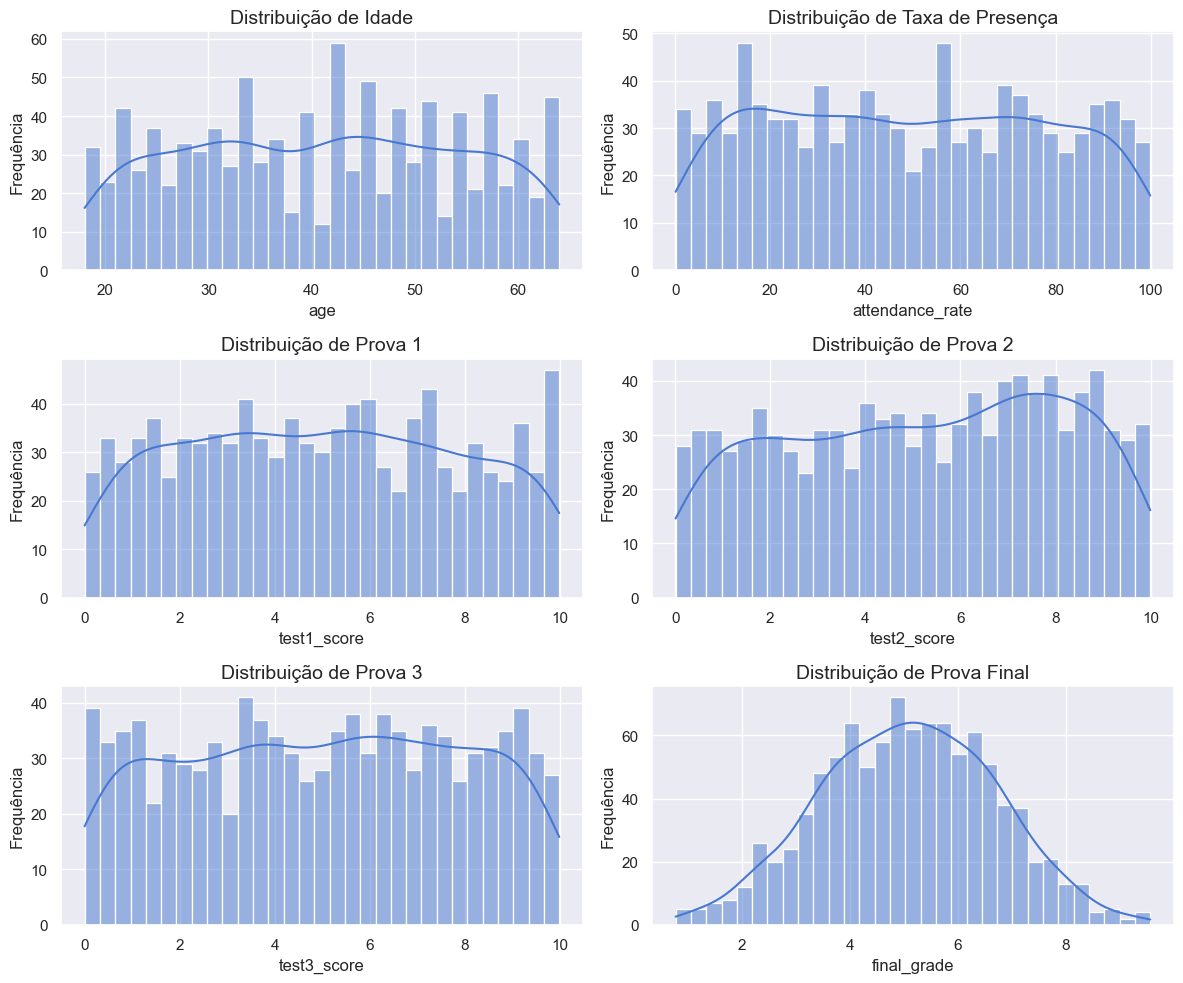

In [11]:
# Definição do layout e vetorização das posições

fig, axes = plt.subplots(3, 2, figsize=(12, 10))  
axes = axes.flatten()

# Definição de bins pela raiz quadrada de N

n = df.shape[0]
bins = int(np.sqrt(n))

# Criação dos histogramas por colunas quantitativas.

sns.histplot(df['age'], bins=bins, kde=True, ax=axes[0])

sns.histplot(df['attendance_rate'], bins=bins, kde=True, ax=axes[1])

sns.histplot(df['test1_score'], bins=bins, kde=True, ax=axes[2])

sns.histplot(df['test2_score'], bins=bins, kde=True, ax=axes[3])

sns.histplot(df['test3_score'], bins=bins, kde=True, ax=axes[4])

sns.histplot(df['final_grade'], bins=bins, kde=True, ax=axes[5])

# Laço de Repetição para nomear os gráficos

for i, titulo in enumerate(['Idade', 'Taxa de Presença', 'Prova 1', 'Prova 2', 'Prova 3', 'Prova Final']):
    axes[i].set_title(f"Distribuição de {titulo}")
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.savefig('../fig/distribution.png')
plt.show()

# **Dados Qualitativos**

## Proporção

0: 50.90%
1: 49.10%


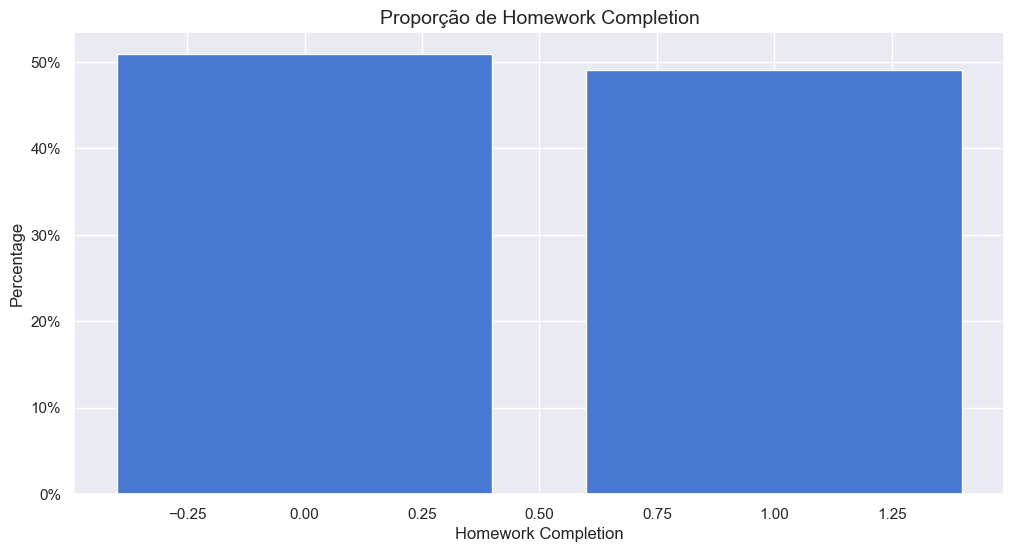

In [28]:
# Proporção de homework_completion

proportion_hwc = df['homework_completion'].value_counts(normalize=True) * 100
for status, prop in proportion_hwc.items():
    print(f"{status}: {prop:.2f}%")

fig1 = plt.figure(1)
fig1.set_size_inches(12,6)
plt.bar(proportion_hwc.index, proportion_hwc.values)
plt.title('Proporção de Homework Completion')
plt.xlabel('Homework Completion')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.savefig('../fig/homework_completion_prop.png')


advanced: 34.90%
beginner: 33.90%
intermediate: 31.20%


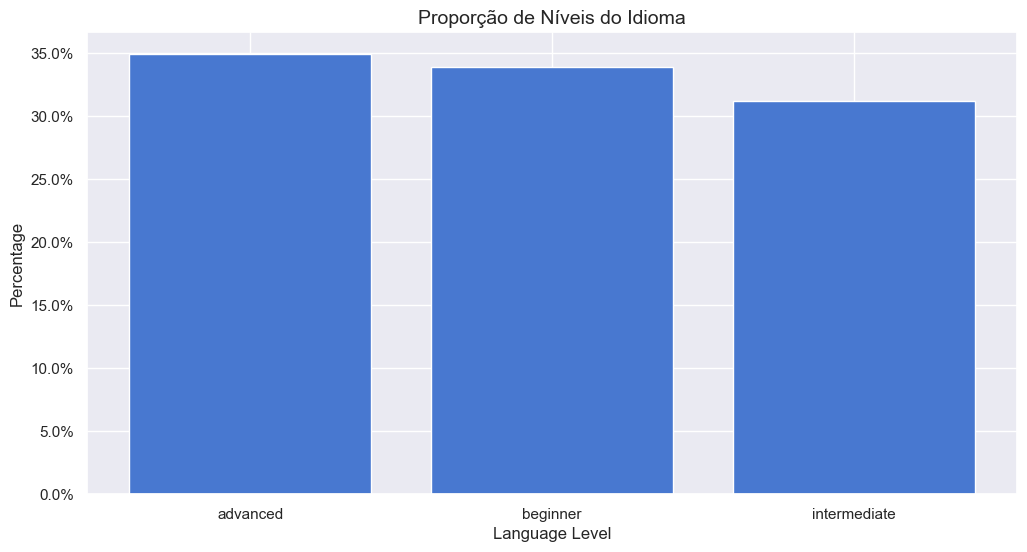

In [13]:
# Proporção dos níveis de fala (language_level)

proportion_language_level = df['language_level'].value_counts(normalize=True) * 100

for status, prop in proportion_language_level.items():
    print(f"{status}: {prop:.2f}%")
    
fig2 = plt.figure(2)
fig2.set_size_inches(12,6)
plt.bar(proportion_language_level.index, proportion_language_level.values)
plt.title('Proporção de Níveis do Idioma')
plt.xlabel('Language Level')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.savefig('../fig/language_level_prop.png')

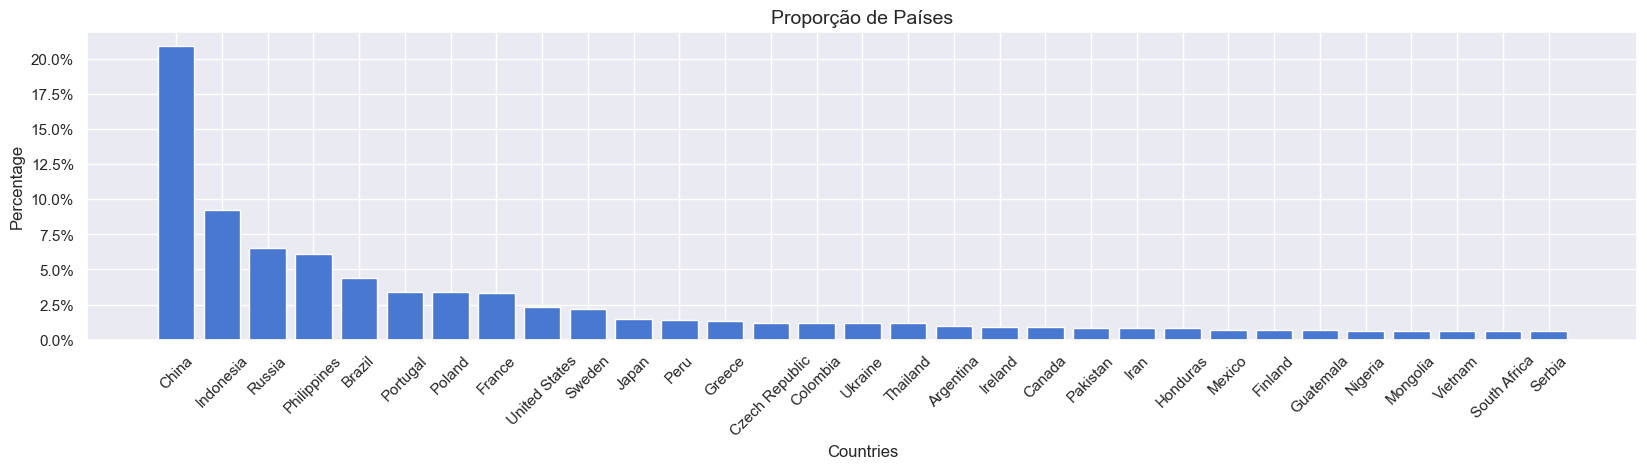

In [14]:
# Proporção de Países

# Contagem e Filtro acima de 5 alunos para o mesmo país
counts = df['country'].value_counts()
counts_filtered = counts[counts > 5]

# Calcula a proporção apenas desses países

proportion_countries = (counts_filtered / counts.sum()) * 100

# Bloco comentado pela quantidade de linhas 
# for status, prop in proportion_countries.items():
#     print(f"{status}: {prop:.2f}%")
    
fig3 = plt.figure(3)
fig3.set_size_inches(20, 4)
plt.bar(proportion_countries.index, proportion_countries.values)
plt.xticks(rotation=45)
plt.title('Proporção de Países')
plt.xlabel('Countries')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.savefig('../fig/countries_prop.png', bbox_inches='tight')

41-50: 23.60%
31-40: 21.40%
21-30: 20.90%
51-60: 20.30%
61-70: 8.30%
0-20: 5.50%


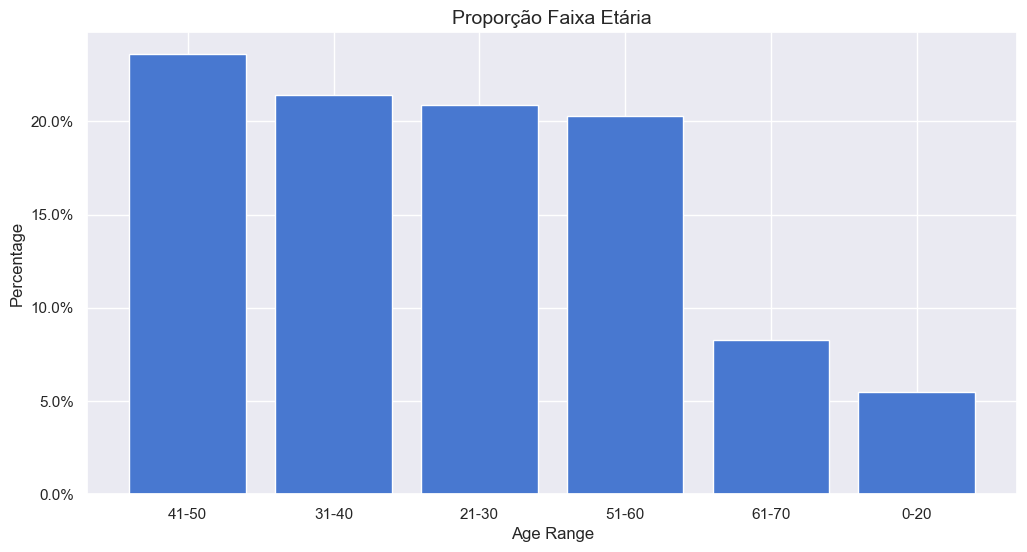

In [15]:
# proportion age_range

proportion_ar = df['age_range'].value_counts()

proportion_ar = (proportion_ar / proportion_ar.sum()) * 100

for status, prop in proportion_ar.items():
    print(f"{status}: {prop:.2f}%")
    
# graph for proportion age range

fig4 = plt.figure(4)
fig4.set_size_inches(12,6)
plt.bar(proportion_ar.index, proportion_ar.values)
plt.title('Proporção Faixa Etária')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.savefig('../fig/age_range_prop.png')


In [16]:
# Dados Quantitativos

In [17]:
df[quantitative].describe()

,age,attendance_rate,test1_score,test2_score,test3_score,final_grade
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41.12,49.16,5.01,5.22,5.00,5.07
std,13.30,28.95,2.86,2.86,2.90,1.62
min,18.00,0.04,0.00,0.01,0.00,0.78
25%,30.00,23.82,2.59,2.68,2.54,3.94
50%,42.00,48.27,5.04,5.38,5.13,5.09
75%,52.00,73.81,7.31,7.66,7.48,6.24
max,64.00,99.94,9.99,9.99,9.99,9.56


In [18]:
# Médias

mean = df[quantitative].mean()
median = df[quantitative].median()
std = df[quantitative].std(ddof=1)

std

age               13.30
attendance_rate   28.95
test1_score        2.86
test2_score        2.86
test3_score        2.90
final_grade        1.62
dtype: float64

In [19]:
## Médias das variáveis quantitativas agrupadas

In [20]:
df_age_range = df.groupby('age_range')[quantitative].mean()
df_age_range

,age,attendance_rate,test1_score,test2_score,test3_score,final_grade
age_range,,,,,,
0-20,19.15,44.04,4.90,5.06,5.63,5.20
21-30,25.51,50.97,4.91,5.43,4.78,5.04
31-40,35.24,48.20,5.34,5.15,4.92,5.14
41-50,45.49,48.80,4.96,5.07,5.43,5.15
51-60,55.52,47.48,5.07,5.35,4.72,5.05
61-70,62.54,55.64,4.42,5.05,4.77,4.75


In [21]:
df_level = df.groupby('language_level')[quantitative].mean()
df_level

,age,attendance_rate,test1_score,test2_score,test3_score,final_grade
language_level,,,,,,
advanced,40.91,49.63,4.98,5.29,4.83,5.03
beginner,40.66,46.91,5.23,5.19,5.09,5.17
intermediate,41.86,51.08,4.79,5.17,5.09,5.02


In [22]:
df_homework = df.groupby('homework_completion')['final_grade'].mean()
df_homework

homework_completion
completed       5.14
not completed   5.01
Name: final_grade, dtype: float64

## Correlação

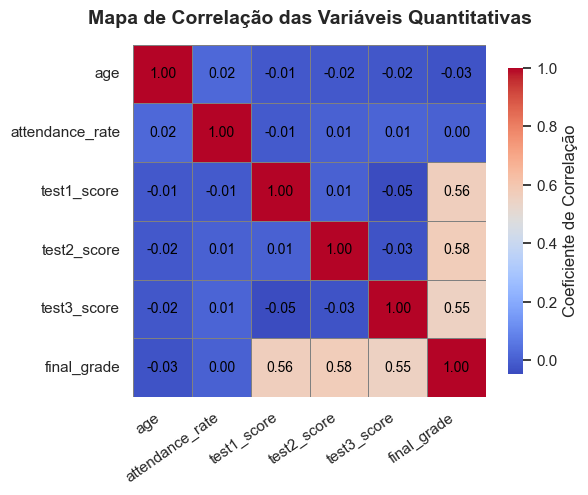

In [23]:
# Correlação das colunas quantitativas

plt.figure(figsize=(6, 8))

correlation = df[quantitative].corr()

sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="gray",
    square=True,  # Deixa os quadrados simétricos
    cbar_kws={"shrink": 0.4, "label": "Coeficiente de Correlação"},  # Legenda menor e nomeada
    annot_kws={"size": 10, "color": "black"}  # Fonte dos números
)

plt.title("Mapa de Correlação das Variáveis Quantitativas", fontsize=14, weight='bold', pad=15)
plt.xticks(rotation=35, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../fig/correlation.png')
plt.show()


## Identificação de Outliers

Primeiro, vamos configurar a calculadora de outliers a partir de um limite inferior e um limite superior, usando IQR.

In [24]:
# Criação da calculadora de IQR por meio de orientação de objetos

class IQR_Calculator:
    def __init__(self, data):
        self.data = data
        self.q1 = None
        self.q3 = None
        self.iqr = None
        self.sup_limit = None
        self.inf_limit = None
        
    def calculate_quartiles(self):
        self.q1 = self.data.quantile(0.25)
        self.q3 = self.data.quantile(0.75)
        return self.q1, self.q3
    
    def calculate_iqr(self):
        self.iqr = self.q3 - self.q1
        return self.iqr
    
    def calculate_limits(self):
        self.inf_limit = self.q1 - 1.5 * self.iqr
        self.sup_limit = self.q3 + 1.5 * self.iqr
        return self.inf_limit, self.sup_limit
    
    def get_outliers(self):
        if self.inf_limit is None or self.sup_limit is None:
            self.calculate_limits()
        outliers = self.data[(self.data < self.inf_limit) | (self.data > self.sup_limit)]
        return outliers

for col in quantitative:
    print(f"\nColuna: {col}")
    IQR = IQR_Calculator(df[col])
    IQR.calculate_quartiles()
    IQR.calculate_iqr()
    inf, sup = IQR.calculate_limits()
    outliers = IQR.get_outliers()
    print(f"Limite inferior: {inf}")
    print(f"Limite superior: {sup}")
    print(f"Nº de outliers: {len(outliers)}")


Coluna: age
Limite inferior: -3.0
Limite superior: 85.0
Nº de outliers: 0

Coluna: attendance_rate
Limite inferior: -51.158750000000005
Limite superior: 148.79125
Nº de outliers: 0

Coluna: test1_score
Limite inferior: -4.49
Limite superior: 14.39
Nº de outliers: 0

Coluna: test2_score
Limite inferior: -4.793749999999999
Limite superior: 15.13625
Nº de outliers: 0

Coluna: test3_score
Limite inferior: -4.880000000000001
Limite superior: 14.9
Nº de outliers: 0

Coluna: final_grade
Limite inferior: 0.48291666666666666
Limite superior: 9.699583333333333
Nº de outliers: 0


In [25]:
# Z-Score para detecção de outliers

class ZScore_Calculator:
    def __init__(self, data, threshold=3):
        self.data = data
        self.z_scores = None
        self.threshold = threshold
        self.outliers = None

    def calculate_zscores(self):
        self.z_scores = zscore(self.data)
        return self.z_scores

    def get_outliers(self):
        if self.z_scores is None:
            self.calculate_zscores()
        self.outliers = self.data[abs(self.z_scores) > self.threshold]
        return self.outliers

# Facilitar a utilização para o objeto

ZS = ZScore_Calculator(df[col])

print(f"Z-Score threshold: {ZS.threshold}")
for col in quantitative:
    print(f"\nColuna: {col}")
    zscores = ZS.calculate_zscores()
    outliers = ZS.get_outliers()
    print(f"Nº de outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f'Outliers: {outliers}')

Z-Score threshold: 3

Coluna: age
Nº de outliers: 0

Coluna: attendance_rate
Nº de outliers: 0

Coluna: test1_score
Nº de outliers: 0

Coluna: test2_score
Nº de outliers: 0

Coluna: test3_score
Nº de outliers: 0

Coluna: final_grade
Nº de outliers: 0


In [ ]:
# Retornar a coluna 'homework_completion' para 0 ou 1 para o modelo
df['homework_completion'] = df['homework_completion'].map({'not completed': 0, 'completed': 1})
df_proc_cats = df.copy()

# Carregar novo dataset processado e sem strings nas colunas de features

df_proc_cats.to_csv('../data/processed/students_proc.csv', index=False)

In [27]:
# Verificar NAs
df_proc_cats.isna().sum()

student_id          0
student_name        0
age                 0
email               0
country             0
                   ..
test3_score         0
teacher_feedback    0
age_range           0
final_grade         0
classification      0
Length: 15, dtype: int64